# analysing the present condition in morocco

In [1]:
# importing the required libraries
import pandas as pd
# visualisations libraries
import matplotlib.pyplot as plt
% matplotlin inline
import seaborn as sns
import plotly.express as rx
# manipulating the default  plot size 
plt.rParams['figure.figsize']=10,12
#disable warning
import warnings
warnings.filterwarnings('ignore')


UsageError: Line magic function `%` not found.


In [7]:
#read .xlsx file by creating dataframe using pandas 

df = pd.read_excel(r"C:\Users\PC-KARIM\Desktop\datamaroc.xlsx")
df_morroco=df.copy()
df.head()

,Date,Confirmed,Deaths,Deaths per day,Recovered,Recovered per day,Infections per day
0,2020-03-02,1,0,0,0,0,1
1,2020-03-03,1,0,0,0,0,0
2,2020-03-04,1,0,0,0,0,0
3,2020-03-05,2,0,0,0,0,0
4,2020-03-06,2,0,0,0,0,1


In [6]:
df.columns

Index(['Date ', 'Confirmed', 'Deaths', 'Deaths per day', 'Recovered',
       'Recovered per day', 'Infections per day'],
      dtype='object')

In [3]:
region = pd.read_excel(r"C:\Users\PC-KARIM\Desktop\region.xlsx")
region_morocco = region.copy()
region 

,Region,cases,Population
0,Casablanca-Settat,521,6861739
1,Rabat-Salé-Kénitra,237,4580866
2,Marrakech-Safi,335,4220569
3,Fès-Meknès,215,4236892
4,Tanger-Tetouan-Al Hoceima,153,3556729
5,Oriental,108,2314346
6,Drâa-Tafilalet,72,1635008
7,Béni Mellal-Khénifra,48,2520776
8,Souss-Massa,23,2676847
9,Laâyoune-Sakia El Hamra,4,367758


In [4]:
city = pd.read_excel(r"C:\Users\PC-KARIM\Desktop\citys.xlsx")
dff_morroco=city.copy()
city.head()

,Unnamed: 0,city,Confirmed cases
0,NaN,casa,259
1,NaN,marrakech,179
2,NaN,mkenes,56
3,NaN,rabat,94
4,NaN,fes,41


In [5]:
# highlight cities by infiction
tot_cases = city.sort_values(by='Confirmed cases',ascending=False)
tot_cases = tot_cases.reset_index(drop=True)
tot_cases.style.background_gradient(cmap='Reds')

C:\Users\PC-KARIM\Anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,Unnamed: 0,city,Confirmed cases
0,nan,casa,259
1,nan,marrakech,179
2,nan,rabat,94
3,nan,mkenes,56
4,nan,fes,41
5,nan,tanges asila,39
6,nan,skhitar tmara,37
7,nan,oujda angad,29
8,nan,tetouant,27
9,nan,sales,25


In [6]:
# totlal cases
region_total = region['cases'].sum()
print('Total number of COVID-19 across morocco till date (07/04/2020):',region_total)

Total number of COVID-19 across morocco till date (07/04/2020): 1719


In [52]:
df.head()

,Date,Confirmed,Deaths,Deaths per day,Recovered,Recovered per day,Infections per day
0,2020-03-02,1,0,0,0,0,1.0
1,2020-03-03,1,0,0,0,0,0.0
2,2020-03-04,1,0,0,0,0,0.0
3,2020-03-05,2,0,0,0,0,0.0
4,2020-03-06,2,0,0,0,0,1.0


In [9]:
#create intertive ghraph using ploty
import plotly.graph_objects as go
import plotly as py 
fig=go.Figure()
fig.add_trace(go.Scatter(x=df['Date '],y=df['Infections per day'],mode='lines+markers',name='Infections per day'))
fig.update_layout(title_text='الحالات المؤكدة في اليوم',plot_bgcolor='rgb(230,230,230)')
fig.show()

#New cases dail in moroccoc
import plotly.express as rx

fig=rx.bar(df,x='Date ',y='Infections per day',barmode='group',height=400)
fig.update_layout(title_text='الحالات المؤكدة في اليوم',plot_bgcolor='rgb(230,230,230)')
fig.show()




In [10]:
# cumulative cases in morocco

fig=rx.bar(df,x='Date ',y='Infections per day',color='Infections per day',orientation='v',height=600,
text='Infections per day',color_discrete_sequence=rx.colors.cyclical.IceFire)
fig.update_layout(plot_bgcolor='rgb(230,230,230)')
fig.show()

In [12]:
# THIS LINE IS MOST IMPORTANT AS THIS WILL DISPLAY PLOT ON 
#NOTEBOOK WHILE KERNEL IS RUNNING
#Time Series plot for knwoing the spread
import plotly as py 
import plotly.graph_objects as go
import pandas as pd
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)  # THIS LINE IS MOST IMPORTANT AS THIS WILL DISPLAY PLOT ON 
#NOTEBOOK WHILE KERNEL IS RUNNING
#Time Series plot for knwoing the spread
fig=go.Figure()
fig.add_trace(go.Scatter(
                   x=df['Date '], 
                   y=df['Infections per day'],
                   name = 'Infections per day',
                   line_color='deepskyblue',
                   opacity = 0.8  ))
fig.add_trace(go.Scatter(
                   x=df['Date '],
                   y=df['Recovered per day'],
                   name = 'Recovered per day',
                   line_color='green',
                   opacity = 0.8  ))
fig.add_trace(go.Scatter(
                   x=df['Date '],
                   y=df['Deaths per day'],
                   name = 'Deaths per day',
                   line_color='red',
                   opacity = 0.8  ))
fig.update_layout(title_text='تغيرات مرض كوفيذ 19 في المغرب',xaxis_rangeslider_visible=True)
py.offline.iplot(fig)


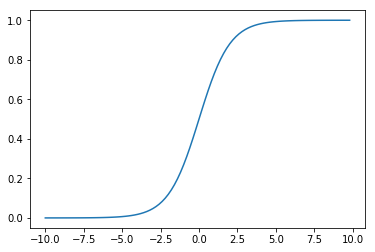

In [10]:
import math
import numpy as np
x= np.arange(-10., 10., 0.2)
def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+math.exp(-item)))
    return a

import matplotlib.pyplot as plt
import numpy as np

sig = sigmoid(x)
plt.plot(x,sig)
plt.show()


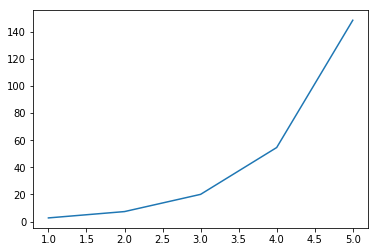

In [11]:
x= np.array([1,2,3,4,5])
y=np.exp(x)
plt.plot(x,y)
plt.show()

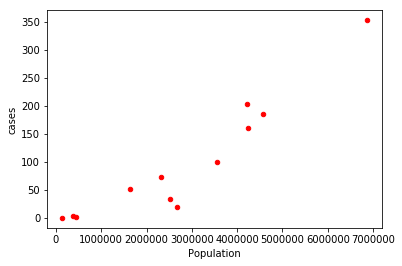

In [36]:
# a scatter plot comparing confimred cases and population
region['Population']=pd.to_numeric(region['Population'])
region.plot(kind='scatter',x='Population',y='cases',color='red')
plt.show()


In [38]:
region.head()


,Region,cases,Population
0,Casablanca-Settat,353,6861739
1,Rabat-Salé-Kénitra,186,4580866
2,Marrakech-Safi,204,4220569
3,Fès-Meknès,160,4236892
4,Tanger-Tetouan-Al Hoceima,99,3556729


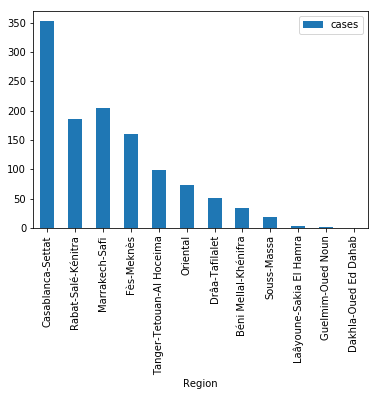

In [18]:
# a simple line plot
region.plot(kind='bar',x='Region',y='cases')

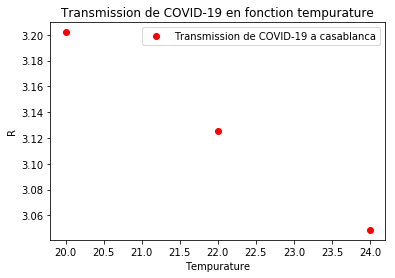

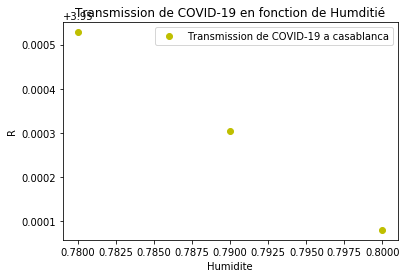

In [65]:
# tempurature et humidite relative de casablanca et ouarzazate mois(4,5,6)
temp_casa=[20,22,24] # temp by C°

humd_casa = [0.79,0.78,0.8]  # humidite by %

# function of transmission by tempurature  
def trans(temp_casa):
    R = []
    for temp in temp_casa:
        R.append((3.968)- (0.0383*temp))
    return R # cofficent de tranfmission
    
funtemp = trans(temp_casa)
plt.plot(temp_casa,funtemp,'ro',label='Transmission de COVID-19 a casablanca')
plt.title('Transmission de COVID-19 en fonction tempurature')
plt.xlabel('Tempurature')
plt.ylabel('R')
plt.legend()
plt.show()


# transmission COVID-19 by Humdite
def transH(humd_casa):
    R = []
    for humd in humd_casa:
        R.append((3.968)- (0.0224*humd))
    return R # cofficent de tranfmission
    
funhmd = transH(humd_casa)

plt.plot(humd_casa,funhmd,'yo',label='Transmission de COVID-19 a casablanca')
plt.title('Transmission de COVID-19 en fonction de Humditié')
plt.xlabel('Humidite')
plt.ylabel('R')
plt.legend()

plt.show()


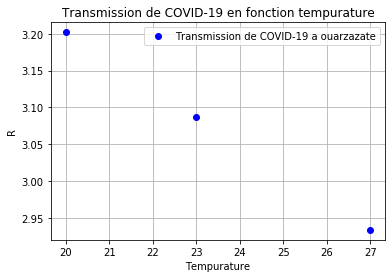

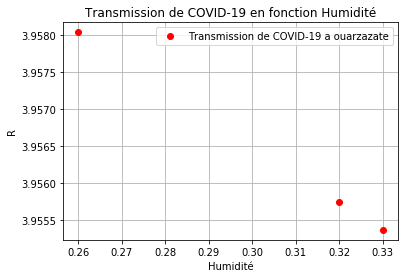

In [20]:
temp_ouar=[20,23,27]
humd_ouar = [0.33,0.26,0.32]

# function of transmission by tempurature  
def transOU(temp_ouar):
    R = []
    for temp in temp_ouar:
        R.append((3.968)- (0.0383*temp))
    return R # cofficent de tranfmission
    
funtempp = transOU(temp_ouar)
plt.plot(temp_ouar,funtempp,'bo',label='Transmission de COVID-19 a ouarzazate')
plt.title('Transmission de COVID-19 en fonction tempurature')
plt.xlabel('Tempurature')
plt.ylabel('R')
plt.legend()
plt.grid()
plt.show()

# function of transmission by tempurature  
def transH(humd_ouar):
    R = []
    for temp in humd_ouar:
        R.append((3.968)- (0.0383*temp))
    return R # cofficent de tranfmission
    
funH = transH(humd_ouar)
plt.plot(humd_ouar,funH,'ro',label='Transmission de COVID-19 a ouarzazate')
plt.title('Transmission de COVID-19 en fonction Humidité')
plt.xlabel('Humidité')
plt.ylabel('R')
plt.legend()
plt.grid()
plt.show()

In [6]:
# herd imunity in epidimology to make virus sable 
# R0 = 2 ~ 3
R = 3.968
HERD  = R - 1/R
HERD = 1-1/R
print(HERD*100,'%')



74.7983870967742 %


In [11]:

# THIS LINE IS MOST IMPORTANT AS THIS WILL DISPLAY PLOT ON 
#NOTEBOOK WHILE KERNEL IS RUNNING
#Time Series plot for knwoing the spread
import plotly as py 
import plotly.graph_objects as go
import pandas as pd
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)  # THIS LINE IS MOST IMPORTANT AS THIS WILL DISPLAY PLOT ON 
#NOTEBOOK WHILE KERNEL IS RUNNING
#Time Series plot for knwoing the spread
fig=go.Figure()
fig.add_trace(go.Bar(
                   x=df['Date '], 
                   y=df['Infections per day'],
                   name = 'Infections per day',
                   marker_color='blue',
                       ))
fig.add_trace(go.Bar(
                   x=df['Date '],
                   y=df['Recovered per day'],
                   name = 'Recovered per day',
                    marker_color='Green',
                     ))
fig.add_trace(go.Bar(
                   x=df['Date '],
                   y=df['Deaths per day'],
                   name = 'Deaths per day',
                    marker_color='Red',
                    ))
fig.update_layout(title_text='تغيرات مرض كوفيذ 19 في المغرب',
         xaxis_tickfont_size=14,
         yaxis=dict(
        title='مجموع الحالات في المغرب ',
        titlefont_size=16,
        tickfont_size=14,
                  ),
                  
        legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
                  ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)
fig.show()       
                 



In [18]:
import plotly.express as rx
fig = rx.scatter_geo(region, locations="Region", color="Region",
                     hover_name="Region", size="cases",
                     projection="natural earth", title = 'Confirmed Cases')
fig.show()

In [22]:
df.head()

,Date,Confirmed,Deaths,Deaths per day,Recovered,Recovered per day,Infections per day
0,2020-03-02,1,0,0,0,0,1
1,2020-03-03,1,0,0,0,0,0
2,2020-03-04,1,0,0,0,0,0
3,2020-03-05,2,0,0,0,0,0
4,2020-03-06,2,0,0,0,0,1


In [13]:
# Transforming Data for Forecasting
confirmed = df.groupby('Date ').sum()['Infections per day'].reset_index()
deaths = df.groupby('Date ').sum()['Deaths per day'].reset_index()
recovered = df.groupby('Date ').sum()['Recovered per day'].reset_index()


In [14]:
confirmed.columns = ['ds','y']
#confirmed['ds'] = confirmed['ds'].dt.date
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [15]:
confirmed.head()
confirmed.tail()

,ds,y
64,2020-05-05,166
65,2020-05-06,189
66,2020-05-07,140
67,2020-05-08,163
68,2020-05-09,199


In [16]:
# Forecasting Total Number of Cases in morrocco 
#Forecasting Total Number of Cases Worldwide
#Prophet
#We use Prophet, a procedure for forecasting time series data 
#based on an additive model where non-linear trends are fit with yearly,
#weekly, and daily seasonality, plus holiday effects. It works best with time series that 
#have strong seasonal effects and several seasons of historical data. Prophet is robust
#to missing data and shifts in the trend, and typically handles outliers well. It is also an
#open source software released by Facebook’s Core Data Science team.
#It is available for download on CRAN and PyPI.

In [17]:
# Forecasting Confirmed Cases n morocco with Prophet (Baseline)
#We perform a week's ahead forecast with Prophet, with 95% prediction
#intervals. Here, no tweaking of seasonality-related parameters and 
#additional regressors are performed.

from fbprophet import Prophet 
m = Prophet(interval_width=0.95, weekly_seasonality=True)
m.fit(confirmed)
future = m.make_future_dataframe(periods=7,
                                   freq='d',
                               include_history=True)
future_confirmed = future.copy() # for non-baseline predictions later on
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\PC-KARIM\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



,ds
71,2020-05-12
72,2020-05-13
73,2020-05-14
74,2020-05-15
75,2020-05-16


In [18]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
71,2020-05-12,192.675840,117.396492,269.366010
72,2020-05-13,200.774826,121.490498,275.049515
73,2020-05-14,201.579780,127.703234,277.436085
74,2020-05-15,220.470543,146.801868,294.586083
75,2020-05-16,210.883641,138.879264,281.907423


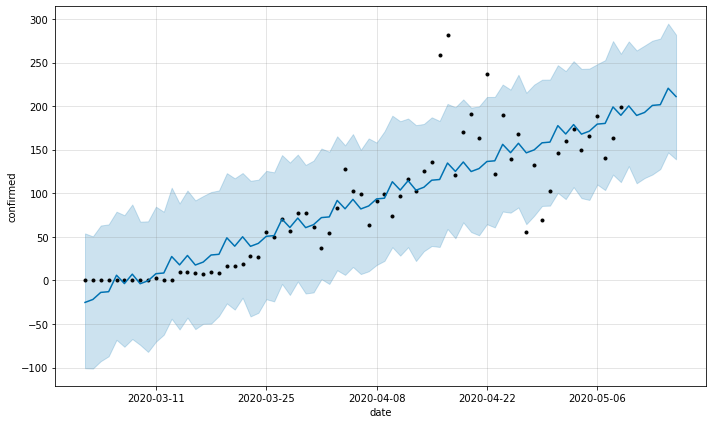

In [19]:
#confirmed_forecast_plot = m.plot(forecast)
predict_fig = m.plot(forecast, xlabel='date', ylabel='confirmed')

#display(predict_fig)
# Limited data inputs and rapid changes make predictions difficult

In [38]:
# from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.api import SimpleExpSmoothing 
 # SimpleExpSmoothing 
# SES is a good choice for forecasting data with no clear trend or seasonal pattern.
 #ŷt+1 = ŷt + α(yt -ŷt)

#ŷt+1 = αyt+ (1-α)ŷt   if α = 1 then  ŷt+1 = y      0 =< α =<1
#if α = 0 then ŷt+1 = ŷt  that mean forcasti does’n change 
 # forcast is the conision beteww thos values                                 cnt forcast 


#df_morroco=df.copy()
#df_morroco
    


In [39]:
data_maroc = df_morroco[['Date ','Infections per day']]
data_maroc.head()

,Date,Infections per day
0,2020-03-02,1
1,2020-03-03,0
2,2020-03-04,0
3,2020-03-05,0
4,2020-03-06,1


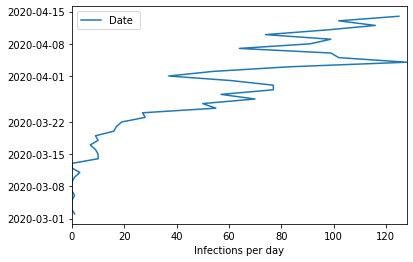

In [40]:
data_maroc.plot.line(x = 'Infections per day',y = 'Date ')
plt.show()

In [50]:
import datetime
ser = pd.Series(data_maroc['Infections per day'])
ser.head()
start = datetime.datetime(2020, 3, 2)
end = datetime.datetime(2020, 4, 15)
index=pd.date_range(start,end,freq='D')
forc = pd.Series(ser, index)



In [58]:
import matplotlib.pyplot as plt
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10)
 # Add x-axis and y-axis
ax.scatter(index.values,
          forc  ,
        color='purple')
# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Infections per day"
                      
 title("Figure : spread of infection in morrocco(daily)")
plt.show()

SyntaxError: invalid syntax (<ipython-input-58-c516c2680d80>, line 5)

C:\Users\PC-KARIM\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning:

Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`

C:\Users\PC-KARIM\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning:

Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`

C:\Users\PC-KARIM\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning:

Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.



TypeError: float() argument must be a string or a number, not 'Period'

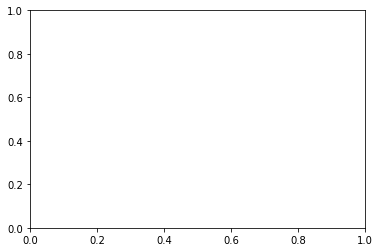

In [59]:
#We will forecast spread of conavirus in §!§! using the 40 few historical data (02-02-2020 - 15-04-2020)
# Here we run three variants of simple exponential smoothing:
#  fit1, we explicitly provide the model with the smoothing parameter 
# α = 0.2
# in fit2, we choose an α=0.6 
#  fit3, we use the auto optimization 
#that allow statsmodels to automatically find an optimized value 
# for us. This is the recommended approach.

# Simple Exponential Smoothing:
fit1 = SimpleExpSmoothing(forc).fit(smoothing_level=0.2,optimized=False)
fcast1 = fit1.forecast(1).rename(r'$\alpha=0.2$')
# plot
fcast1.plot(marker='o', color='blue', legend=True)
fit1.fittedvalues.plot(marker='o',  color='blue')